In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [30]:
(x_train,y_train),(x_test, y_test)=keras.datasets.mnist.load_data()

In [31]:
print(len(x_train))
print(len(x_test))

60000
10000


In [32]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

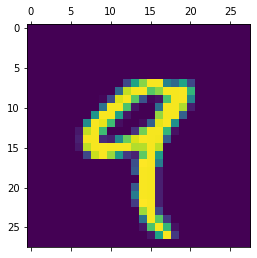

In [33]:
plt.matshow(x_train[4])

In [34]:
y_train[4]

9

In [35]:
y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [36]:
x_test.shape

(10000, 28, 28)

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255




In [39]:
x_train.shape

(60000, 28, 28, 1)

In [42]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 120s 61ms/step - loss: 0.1438 - accuracy: 0.9567
Epoch 2/10
1875/1875 [==============================] - 106s 56ms/step - loss: 0.0483 - accuracy: 0.9848
Epoch 3/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.0338 - accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 106s 56ms/step - loss: 0.0242 - accuracy: 0.9928s - loss: 0.0242 - ac - ETA: 0s - loss: 0.0242 
Epoch 5/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.0182 - accuracy: 0.9940
Epoch 6/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0150 - accuracy: 0.9951
Epoch 7/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0116 - accuracy: 0.9960
Epoch 8/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0091 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0094 - accuracy: 0.9967
Epoch 10

In [45]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 12s 19ms/step - loss: 0.0320 - accuracy: 0.9915


[0.03196418657898903, 0.9915000200271606]

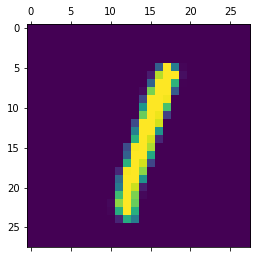

In [52]:
plt.matshow(x_test[5])

In [54]:
y_predicted=cnn.predict(x_test)
y_predicted[5]

array([2.3678428e-09, 9.9998248e-01, 2.1117388e-09, 2.5907651e-12,
       8.7511495e-08, 7.3763676e-11, 8.4792017e-12, 3.9367572e-07,
       1.6995265e-05, 5.2598761e-09], dtype=float32)

In [53]:
np.argmax(y_predicted[5]) 

1

In [56]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [57]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

Text(69.0, 0.5, 'Truth')

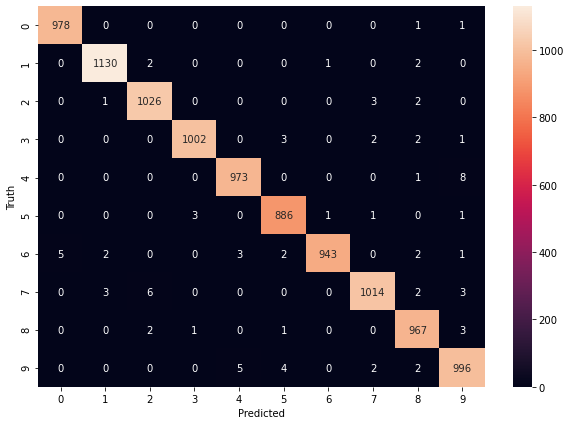

In [63]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')